# Chart Types

In this exercise, we'll review common types of data visualizations. We'll also go over implementing simple examples of each type with a unique dataset.

## Introduction

Data visualization is the front-end of data science. If you want to communicate your findings as an analyst, you need ways to show the data in a digestible, simple manner. This way, anyone that sees your findings will understand what they're looking at and the point your'e trying to make.

[Here's](https://www.data-to-viz.com/caveats.html) a nice list of common tips and solutions that should help you make better-looking, readable graphs. Skim over the linked webpage and refer to it throughout this lesson. For additional reference, here are a few cheatsheets on the libraries we'll be using:

* [pandas](https://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3)

* matplotlib - [1](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf), [2](https://camo.githubusercontent.com/8566d191963c2ada58246241d19a1252c519edea1ecf4049f5bc939e302e36a8/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f63686561747368656574732d322e706e67), [3](https://camo.githubusercontent.com/bc3b143766ed68eb6a851900c317c5d9222eb1471888942afb35137aa5141557/68747470733a2f2f6d6174706c6f746c69622e6f72672f63686561747368656574732f63686561747368656574732d312e706e67)

* [seaborn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

### Installs

Run the code cell below to install the libraries we'll be using.

In [1]:
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt

## Distribution Charts

Distribution charts show the frequency of an attribute such as age, salary, transactions, etc. The data should be:


*   Quantitative (Numerical)
*   Continuous (In a range, e.g. height, weight, temperature)

Most distribution charts are univariate, meaning they examine a single attribute. Bivariate distribution charts also exist, such as heatmaps and 2D density charts, but those are also used for correlation, so we'll discuss them in that section.

The most popular type of distribution chart is the histogram. Let's make one now.

###  Make a Histogram

First, let's load our dataset. We'll use one provided by seaborn called `'iris'`. Iris is a very basic dataset with the following attributes:
* sepal length and width (cm)
* petal length and width (cm)
* species (setosa, versicolour, or virginica)


In the cell below, use seaborn's `.load_dataset()` method with the argument being the dataset we wish to use and assign the resulting dataset to a variable called `iris_dataframe`.

In [2]:
iris_dataframe = seaborn.load_dataset('iris')

iris_dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The seaborn library has a very convenient method for making distribution plots, conveniently name `.histplot()`. Use this function with the following arguments:
* `data` : the dataframe we wish to use
* `x`: the numerical, continuous attribute we want to use


In the cell below, use seaborn's `.histplot()` method with the correct arguments. Make your own choice on which attribute to use.

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

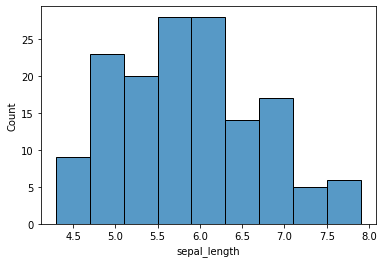

In [8]:
seaborn.histplot(data=iris_dataframe,x='sepal_length')

There's some more fun stuff we can do with this type of graph if we want more specific information. We can:
* add a kernel density estimate to provide additional info about the shape of the distribution
* use hue mapping to draw multiple histograms

We'll do both of these below.

In the cell below, add another argument to your `.histplot()` function called `kde` and set it to `True`.

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

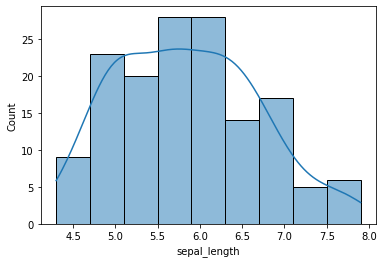

In [7]:
seaborn.histplot(data=iris_dataframe,x='sepal_length',kde=True)

This gives us a smoother look at the shape of our distribution.

Now, in the cell below, add one final argument called `hue` and assign it `species`, so we can see the distribution of the different species.

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

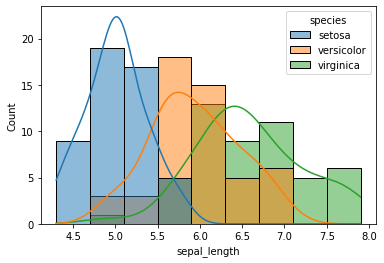

In [9]:
seaborn.histplot(data=iris_dataframe,x='sepal_length',kde=True,hue='species')

Great! That's not all we can do with histograms. Check out the code below to and see what we can make with a dataset as simple as `iris`!

<AxesSubplot:xlabel='petal_length', ylabel='species'>

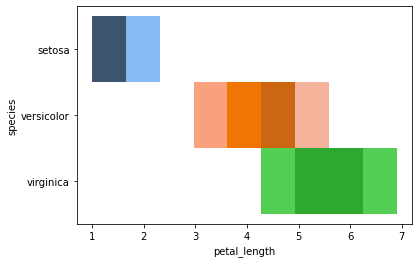

In [10]:
seaborn.histplot(
    iris_dataframe, 
    x="petal_length", 
    y="species", 
    hue="species", 
    legend=False
)

### Other distribution charts:

Violin Plot

<AxesSubplot:xlabel='species', ylabel='petal_length'>

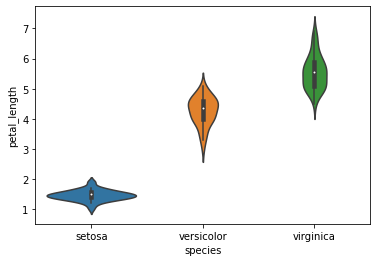

In [11]:
seaborn.violinplot(
    data=iris_dataframe, 
    x="species", 
    y="petal_length"
)

Box Plot

<AxesSubplot:xlabel='species', ylabel='petal_length'>

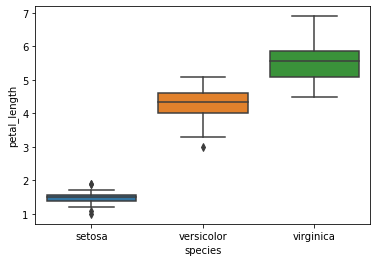

In [12]:
seaborn.boxplot(
    data=iris_dataframe, 
    x="species", 
    y="petal_length"
)

Density Chart

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

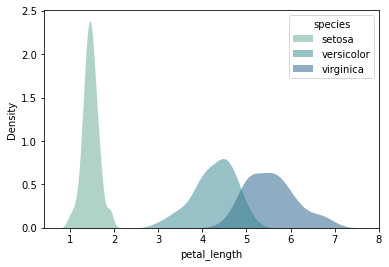

In [13]:
seaborn.kdeplot(
    data=iris_dataframe, 
    x="petal_length", 
    hue="species", 
    fill=True, 
    common_norm=False, 
    palette="crest",
    alpha=.5, 
    linewidth=0
)

## Correlation Charts

Correlation charts are meant to observe how two attributes interact with each other, such as height and weight. Data should be:
* Quantitave
* Continuous or discrete (stepped or quantized)

Correlation charts are bivariate, but some correlation charts also implement a density variable for added visualization.

### Make a scatterplot

We'll use another dataset from seaborn for this, called `'penguins'`. Let's take a look at the dataset once we load it and assign it to a variable. You can use:
* `DATAFRAME.head()` to look at the top five entries of the dataset
* `DATAFRAME.describe()` to see the numerical attributes and basic statistics (like the count, mean, minimum, and maximum) of each.



In [14]:
penguins_dataframe = seaborn.load_dataset('penguins')
penguins_dataframe.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Once again, the seaborn library has a perfect method for making scatterplots, called `.regplot()`. Use this and the following arguments to select a view the relationship between two of our attributes from the `'penguins'` dataset.

Arguments:
* `data`: our dataset, called by the variable it was assigned
* `x`: our independent variable, one of the attributes in our `'penguins'` dataset.
* `y`: our dependent variable, another of the attributes in our `'penguins'` dataset.

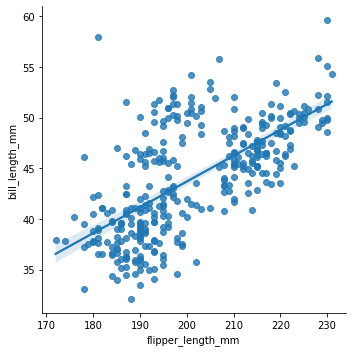

In [19]:
seaborn.lmplot(
    data=penguins_dataframe,
    x='flipper_length_mm',
    y='bill_length_mm'
)

We can see that seaborn automatically adds a linear fit line to our scatterplot. Based on which attributes you picked, it probably doesn't look like much. However, one of our categorical attributes for this dataset is `'species'`. Let's see if we can't color our plot to reflect that.
Add `hue` to your function call and set it to a categorical attribute, such as `'species'`.

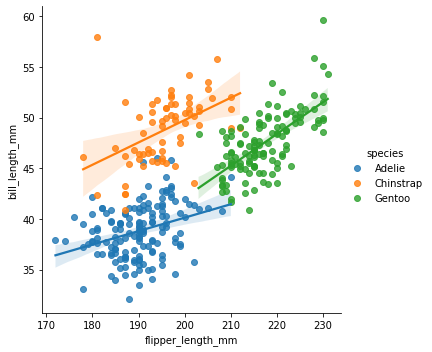

In [18]:
seaborn.lmplot(
    data=penguins_dataframe,
    x='flipper_length_mm',
    y='bill_length_mm',
    hue='species'
)

Great! Now we get a completely different picture, and our fit lines are drawn for each category. Feel free to play around and examine different attributes with this plot type.

### Other correlation charts

Correlogram

This plot type will allow you to analyze the correlations and distributions of all of your numerical attributes at once, using seaborn's `.pairplot()` method, with our dataset as our argument. You can also add our `hue` argument here to differentiate a categorical attribute, as we did above. Additionally, add the `kind` argument and set it to `'reg'` to show the fit lines.

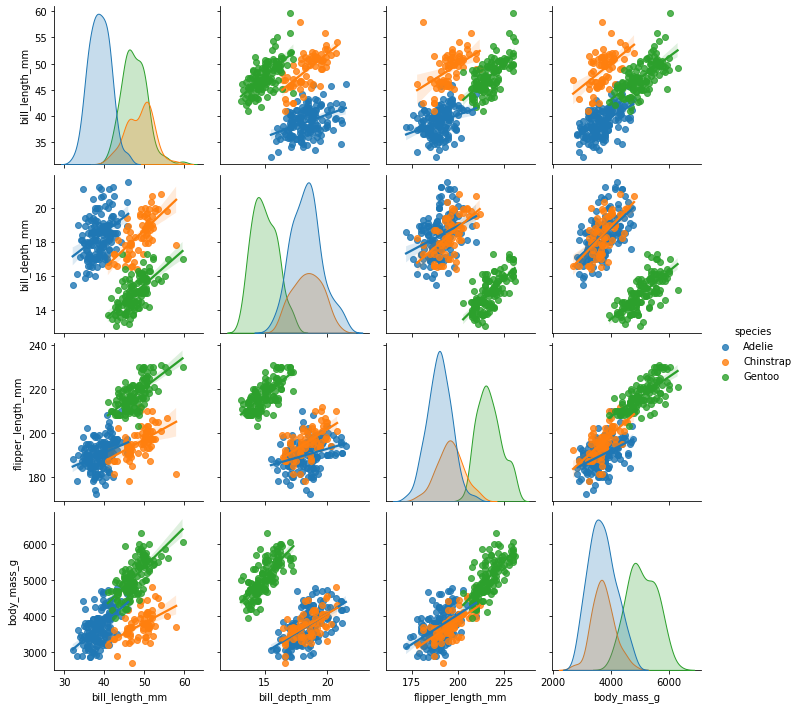

In [21]:
seaborn.pairplot(
    data=penguins_dataframe,
    kind='reg',
    hue='species'
)

We can also make a bubble plot, which lets us add another numerical attribute for visualization:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

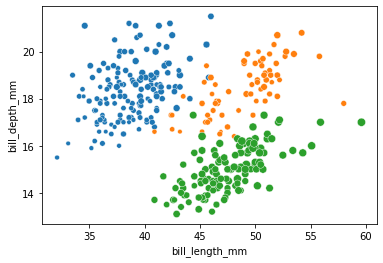

In [22]:
seaborn.scatterplot(
    data=penguins_dataframe, 
    x="bill_length_mm", 
    y="bill_depth_mm", 
    size="body_mass_g", 
    hue="species", 
    legend=False
)

Heatmap

Here's an example of a heatmap from a different dataset, showing passenger density across both months and years.

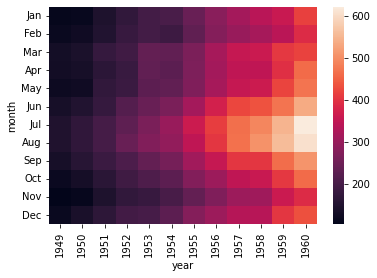

In [23]:
flights = seaborn.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = seaborn.heatmap(flights)

Contour Plot

You can also make smoothed 2D density plots, called contour plots. Here we can see the three different blobs that correlate the species.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

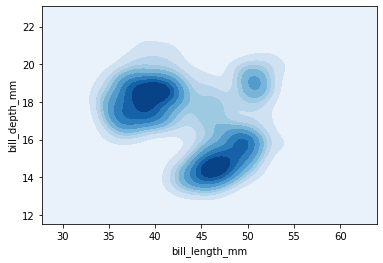

In [24]:
seaborn.kdeplot(
    data=penguins_dataframe, 
    x="bill_length_mm", 
    y="bill_depth_mm", 
    cmap="Blues", 
    shade=True, 
    bw_adjust=.7, 
    thresh=0
  )

## Ranking Charts

We can use ranking charts and aggregate functions to find relationships between categorical and numerical attributes. Data should be:
* Quantitave and qualitative (categorical)
* Any variable types work

### Make a barplot

We'll use seaborn's `tips` dataset for this section. Load the dataset and examine the data.


In [25]:
tips_dataframe = seaborn.load_dataset('tips')
tips_dataframe.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's take a look at the arguments we'll use for seaborn's `.barplot()` method:

* `data`: the dataframe we'll be using
* `x`: our independent variable, usually a categorical attribute
* `y`: our dependent variable, usually a numerical attribute
* `estimator`: our aggregate function, such as `sum`, `max`, or `min`

Try using the `.barplot` method with the your choice of attributes and estimator.

<AxesSubplot:xlabel='sex', ylabel='tip'>

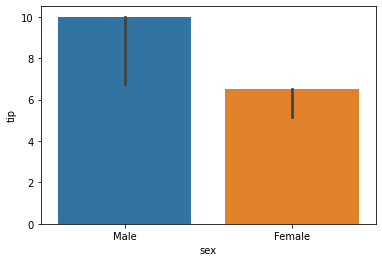

In [28]:
seaborn.barplot(
    data=tips_dataframe,
    x = 'sex',
    y = 'tip',
    estimator= max
)

Let's try using our `hue` argument to add one more categorical variable.

<AxesSubplot:xlabel='sex', ylabel='tip'>

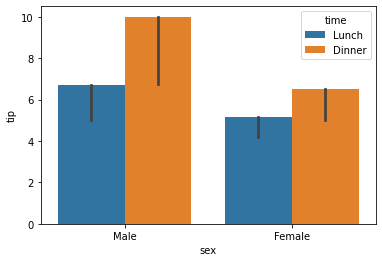

In [29]:
seaborn.barplot(
    data=tips_dataframe,
    x = 'sex',
    y = 'tip',
    estimator= max,
    hue = 'time'
)

When you have a dataset that has both categorical and numerical values, ranking charts can be quite useful!

## Evolution Charts

Evolution charts visualize changes in a numerical attribute over time (another numerical attribute). For this section, we'll use seaborn's `seaice` dataset, but we'll use `matplotlib` methods forr the visualization.

### Make a line chart

Making a line chart is pretty easy. As long as we have our numerical attribute in the order we want, we can just plot it with `plt.plot()`.

Note: We've used the alias `plt` when importing `matplotlib.pyplot`.

Load the `seaice` dataset into a dataframe, assign it to a variable, then use the `.plot()` method with the dataframe's `"Extent"` attribute as its only argument.

In [30]:
seaice_dataframe = seaborn.load_dataset('seaice')
seaice_dataframe.head()

,Date,Extent
0,1980-01-01,14.200
1,1980-01-03,14.302
2,1980-01-05,14.414
3,1980-01-07,14.518
4,1980-01-09,14.594


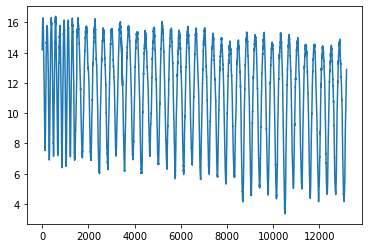

In [42]:
plt.plot(seaice_dataframe["Extent"])

If we want to represent our dates on the X axis properly, we'll need to first confirm that the `"Date"` column is in datetime format. We can use that with the pandas function `.todatetime()`.

Reassign the `"Date"` column to datetime format.

In [49]:
seaice_dataframe["Date"] = pandas.to_datetime(seaice_dataframe["Date"])
seaice_dataframe.dtypes

Date      datetime64[ns]
Extent           float64
dtype: object

Now, we just add the `"Date"` column as the first argument in our `.plot()` method.

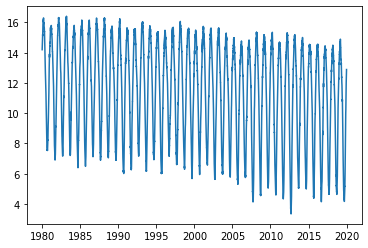

In [50]:
plt.plot(
    seaice_dataframe["Date"],
    seaice_dataframe["Extent"])

Our graph is a little difficult to see. Let's change that. Use the `.subplots()` method with `figsize=(30, 6)` as your argument and assign it to two variables: `fig` and `ax`. Then, call the same `.plot()` method as above on the `ax` plot.

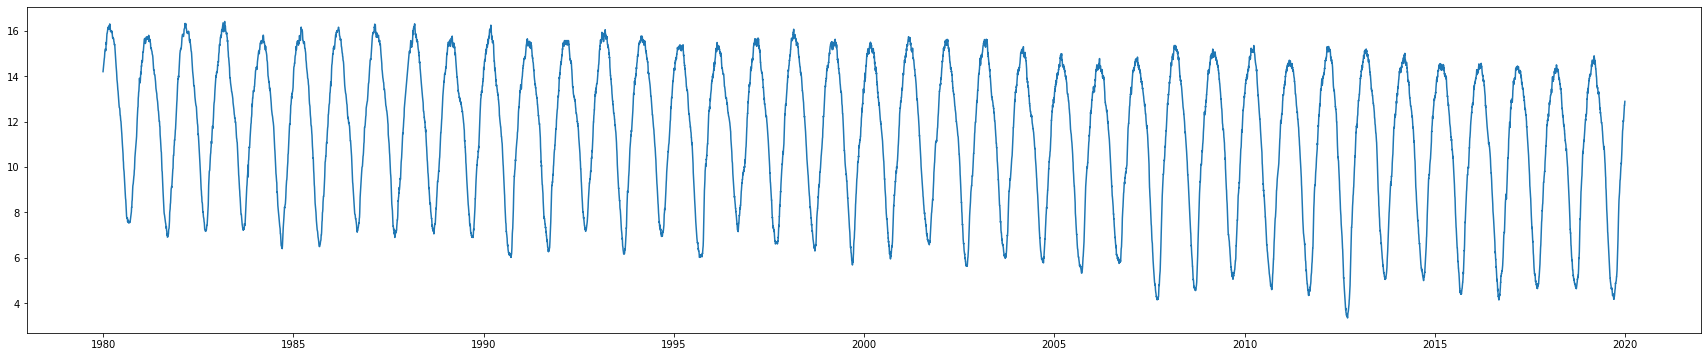

In [51]:
fig, ax =plt.subplots(figsize=(30,6))
ax.plot(
    seaice_dataframe["Date"],
    seaice_dataframe["Extent"])

## Conclusion

And there you have it! We learned how to use some basic chart types to visualize our data. Based on what kind of data you have and what you want to point out about your analysis, you can choose and format the correct chart type to best get your point across.

If you want to learn more chart types in `matplotlib` and `seaborn`, you should browse [this](https://www.python-graph-gallery.com/) website, there are quite a few great examples!

Hopefully your future projects will be a little easier with these tools in mind!